In [39]:
#Density Ratio Function
def sigma(h):
    s = np.exp(-h/30500)
    return s

#Dynamic Pressure Function with airspeed in knots
def dynamic(v,h):
    'the input v -- is in knot'
    'the input h -- is in feet'
    #get our local air density
    rho = sigma(h)*0.2
    #compute the dynamic pressure
    q = 0.5*rho* np.square(v)
    return q


#Aspect Ratio Function
def aspect(b,s):
    """
    Compute aspect ration -- AR.

    Arguments:
    b -- wingspan (m)
    s -- wing area (in m^2)

    Return:
    AR -- aspect(b,S)
    """
    
    AR = np.square(b)/s
    
    return AR

#Parabolic Drag FUnction
def parabolic(b,s,eos):
    """
    Compute Parabolic drag polar on given b,s,eos -- parabolic(b,s,eos).

    Arguments:
    b -- the wing span (in m)
    s -- area of wing surface (in m^2)
    eos -- Oswald efficiency factor

    Return:
    k -- parabolic 
    """
    ar = aspect(b,s)
    k = 1/(np.pi * ar * eos)
    return k

#Induced Drag Coefficient Function
def InducedDragCo(w,v,h,b,s,eos):
    """
    Compute coefficient of induced drag on given w,v,h,b,s,eos -- InducedDragCo(w,v,h,b,s,eos).

    Arguments:
    s -- area of wing surface (in m^2)
    v -- airspeed (in m/s)
    w -- weight of the aircraft (in kg)
    h -- altitude (in feet)
    eos -- Oswald efficiency factor

    Return:
    cd -- drag cofficient 
    
    """
    colift=liftco(w,v,s,h)
    K = parabolic(b,s,eos)
    cdi = (K*np.square(colift)) 
    return cdi
#Total Cd Function
def totalcd(w,v,h,b,s,eos,cd0):
    """
    Compute coefficient of drag on given w,v,h,b,s,eos,cd0 -- totalcd(w,v,h,b,s,eos,cd0).

    Arguments:
    s -- area of wing surface (in m^2)
    v -- airspeed (in m/s)
    w -- weight of the aircraft (in kg)
    h -- altitude (in feet)
    eos -- Oswald efficiency factor
    cd0 -- drag coefficient at zero lift

    Return:
    cd -- drag cofficient 
    """
    CDI = InducedDragCo(w,v,h,b,s,eos)
    cd = CDI + cd0

    return cd


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def stallspeed(w,s,clm,h):
    """
    Compute stall speed.

    Arguments:
    s -- area of wing surface (in m^2)
    clm -- maximum coefficient of lift
    w -- weight of the aircraft (in N)
    h -- altitude (in feet)
   
    Return:
    vs -- stall speed (in m/s)
    
    (≈ 2 line of code)
    """
    
    # YOUR CODE HERE
    rho = 0.02
    vs = np.sqrt((2*w)/(rho*s*clm))
    
    return vs

In [4]:
stallspeed(2968,11.61,1.8,0)

119.17347024863184

In [5]:
def glidingspeed(w,h,b,s,eos,cd0):
    """
    Compute gliding speed.

    Arguments:
    s -- area of wing surface (in m^2)
    b -- wing span (in m)
    eos -- Oswald efficiency factor
    cd0 -- drag coefficient at zero lift
    w -- weight (in kg)
    h -- altitude (in feet)
   
    Return:
    Vg -- Best Gliding speed (in knots)
    
    (≈ 4 line of code)
    """
    
    # YOUR CODE HERE
    k = parabolic(b,s,eos)
    rho = 0.02
    Vg = (np.power(((2*(w*9.8))/(s*rho)),1/2))*(np.power((k/cd0),1/4))
    Vg = Vg*1.944
    
    return Vg

In [6]:
glidingspeed(800,0,10.87,11.61,0.75,0.017)

632.217409011651

In [7]:
def LDRmax(b,s,eos,cd0):
    """
    Compute the maximum lift/drag ratio.

    Arguments:
    s -- area of wing surface (in m^2)
    b -- wing span (in m)
    eos -- Oswald efficiency factor
    cd0 -- drag coefficient at zero lift
   
    Return:
    Em -- maximum L/D ratio
    
    (≈ 3 line of code)
    """
    
    # YOUR CODE HERE
    k = parabolic(b,s,eos)
    
    Em = 1/(2*np.sqrt(k*cd0))
    
    return Em

In [8]:
LDRmax(10.87,11.61,0.75,0.017)

18.77865771178848

In [9]:
def glidingrange(b,s,eos,cd0,h1,h2):
    """
    Compute gliding range.

    Arguments:
    s -- area of wing surface (in m^2)
    b -- wing span (in m)
    eos -- Oswald efficiency factor
    cd0 -- drag coefficient at zero lift
    h1 -- starting gliding altitude (in feet)
    h2 -- end gliding altitude (in feet)
   
    Return:
    x -- Best Gliding range (in feet)
    
    (≈ 2 line of code)
    """
    
    # YOUR CODE HERE
    
    Em = LDRmax(b,s,eos,cd0)
    x =  Em*(h1-h2)
    
    return x

In [10]:
glidingrange(10.87,11.61,0.75,0.017,5000,0)

93893.2885589424

In [11]:
def liftco(w,v,s,h):
    """
    Compute coefficient of lift on given W,v,s -- liftco(w,v,s).

    Arguments:
    s -- area of wing surface (in m^2)
    v -- airspeed (in m/s)
    w -- weight of the aircraft (in N)
    h -- altitude (in feet)

    Return:
    cl -- coefficnet of lift 
    
    (≈ 2 line of code)
    """
    
    # YOUR CODE HERE
    
    
    q = dynamic(v,h)
    cl = w/(q*s)
    
    return cl

In [12]:
liftco(2968,51.4444,11.61,7000)

1.215149206134068

In [13]:
def aoa(v):
    """
    compute angle of attack by given airspeed v -- aoa(v)
    
    Arguments:
    v -- A scalar or numpy array regarding the speed 
    cl -- A scalar regarding coeffienct of lift (use the liftco function plug some piper's numbers)
    AR -- aspect ration (b^2/s)
    Return:
    alpha -- Your computed angle of attack (in rad)
    you need to convert to degrees.
    
    (≈ 2 line of code)
    """
    AR = np.square(9.14)/14.86
    
    # YOUR CODE HERE
    
    cl = liftco(2968,v,11.61,7000)
    alpha = np.rad2deg(cl/(np.pi*2)*(AR+2)/(AR))
    
    return alpha

In [14]:
aoa(100)

3.975861216977711

In [15]:
def neotempv(V0,T):
    """
    Compute new volume of V1.

    Arguments:
    
    V0 -- Volume at 0 degree (in m^3)
    
    T -- Temperature (in C)

    Return:
    V1 -- neovolume(V0,T)
    
    (≈ 1 line of code)
    """
    # YOUR CODE HERE
    V1 = V0*(1+(1/273.2 * T))
    
    return V1

In [16]:
neotempv(5,15)

5.2745241581259155

In [17]:
# GRADED FUNCTION: Altitude

def altitude(Temp):
    """
    Compute altitude.

    Arguments:
    Temp -- celcius (in degree)

    Return:
    alt -- altitude(Temp)
    
    (≈ 1 line of code)
    """
    
    # YOUR CODE HERE
    alt =  (15-Temp)/(2/1000)
    return alt

In [18]:
altitude(-63.15)

39075.0

In [19]:
def state_T(P):
    """
    Compute air temprature T.

    Arguments:
    P -- pressure (in N/m^2)
    rho -- density (sigma function)

    Return:
    T -- state_T(P) (in Kalvin)
    
    (≈ 2 line of code)
    """
    
    # YOUR CODE HERE
    rho = 0.02
    T = P/(rho*189)
    
   
    return T

In [20]:
#at sea level h =0
h = 0
state_T(110000)

29100.5291005291

In [21]:
def static(h):
    t = (15-((h/1000)*2))+273.15
    rho = 0.02
    p = rho * 189*t
    return p

In [22]:
# GRADED FUNCTION: pressure

def total(v,h):
    """
    Compute total pressure based on given v,h -- total(v,h).

    Arguments:
    v -- airspeed (in m/s)
    h -- altitude (in feet)

    Return:
    P -- total pressure(Pascal)
    
    (≈ 3 line of code)
    """
    
    # YOUR CODE HERE
    
    Ps = static(h)
    q = dynamic(v,h)
    P = Ps + q
    
    return P

In [23]:
total(60, 4000)

1374.7188090114328

In [24]:
# GRADED FUNCTION: airspeed

def airspeed(Ps,Pt,h):
    """
    Compute airspeed based on given Pt,Ps,h -- airspeed(Ps,Pt,h).

    Arguments:
    Ps -- staticpressure (in Pascal)
    Pt -- total pressure (in Pascal)
    h -- altitude (in feet)

    Return:
    v -- airspeed (in m/s)
    
    (≈ 2 line of code)
    """
    
    # YOUR CODE HERE
    
    h = sigma(h)*1.2
    v = np.sqrt(2*(Pt-Ps)/h)
    
    return v

In [25]:
airspeed(30000, 31800,5000)

59.45091397961915

In [26]:
def tailvolume(st,xt,sw,mac):
    """
    Compute TAIL VOLUME.

    Arguments:
    sw -- area of wing surface (in m^2)
    xt -- distance to the tail (in m)
    st -- area of tail size (in m^2)
    mac -- average main wing chord (in m)
    
    Return:
    VH -- Tail Volume Coefficient (in feet)
    
    (≈ 1 line of code)
    """
    
    # YOUR CODE HERE
    VH = (st*xt)/(sw*mac)
    
    return VH


def stabilitylong(st,xt,sw,mac,xcg,xac,bw,bt,nt,deaoa):
    """
    Compute TAIL VOLUME.

    Arguments:
    sw -- area of wing surface (in m^2)
    xt -- distance to the tail (in m)
    st -- area of tail size (in m^2)
    mac -- average main wing chord (in m)
    xcg -- center of gravity relative to mac
    xac -- aerodynamic center relative to mac
    bw -- wingspan
    bt -- tail wing span
    nt -- tail efficiency
    deaoa -- de/daw given value
    
    Return:
    cmcl -- dcm/dcl (in feet)
    
    (≈ 5 line of code)
    """
    
    # YOUR CODE HERE
    
    ARt = aspect(bt,st)
    ARw = aspect(bw,sw)
    at = 2*np.pi*(ARt/(ARt+2))
    aw = 2*np.pi*(ARw/(ARw+2))
    VH = tailvolume(st,xt,sw,mac)
    
    cmcl = ((xcg/mac)-(xac/mac))-(at/aw)*nt*VH*(1-deaoa)
    
    return cmcl
    

In [27]:
a = stabilitylong(2,3.6,11.61,1,0.28*1,0.25*1,10.81,3.16,0.99,0.2)
print (a)
if a > 0:
    print ("Negative static statbility")
elif a ==0:
    print("Neutreal static stability")
else:
    print("Positive static statbility")

-0.39036947692840024
Positive static statbility


In [28]:
def totaldrag(w,v,h,b,s,eos,cd0):
    """
    Compute total drag on given w,v,h,b,s,eos,cd0 -- totaldrag(w,v,h,b,s,eos,cd0).

    Arguments:
    s -- area of wing surface (in m^2)
    v -- airspeed (in m/s)
    w -- weight of the aircraft (in kg)
    h -- altitude (in feet)
    eos -- Oswald efficiency factor
    cd0 -- drag coefficient at zero lift

    Return:
    cd -- drag cofficient 
    
    (≈ 3 line of code)
    """
    # YOUR CODE HERE
    
    q = dynamic(v,h)
    cd = totalcd(w,v,h,b,s,eos,cd0)
    D = q*s*cd
    
    return D

def power (w,v,h,b,s,eos,cd0):
    D = totaldrag(w,v,h,b,s,eos,cd0)
    P = D*v
    
    return P

def adjustpower (P,rho,rho2):
    AP = P*(rho/rho2)

    return AP

In [29]:
totaldrag(800,119.17,0,10.87,11.61,0.75,0.017)

281.9135218441324

In [30]:
adjustpower(850000,0.02,1.2)

14166.666666666666

In [31]:
power(800,119.17,0,10.87,11.61,0.75,0.017)

33595.63439816526

In [54]:
def glidingspeed(w,h,b,s,eos,cd0):
    """
    Compute gliding speed.

    Arguments:
    s -- area of wing surface (in m^2)
    b -- wing span (in m)
    eos -- Oswald efficiency factor
    cd0 -- drag coefficient at zero lift
    w -- weight (in kg)
    h -- altitude (in feet)
   
    Return:
    Vg -- Best Gliding speed (in knots)
    
    (≈ 4 line of code)
    """
    
    # YOUR CODE HERE
    k = parabolic(b,s,eos)
    # rho = 0.02
    rho = sigma(h)*0.02
    Vg = (np.power(((2*(w*9.8))/(s*rho)),1/2))*(np.power((k/cd0),1/4))
    Vg = Vg*1.944
    
    return Vg

In [47]:
glidingspeed(800,0,10.87,11.61,0.75,0.017)

632.217409011651

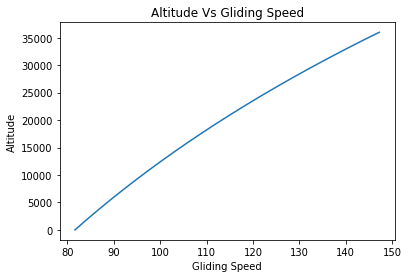

In [75]:
a = np.arange(0,36000,1) #set up the altitude range
y = glidingspeed(800,a,10.87,11.61,0.75,0.017)

#ploting
plt.plot(y,a) 
plt.ylabel ('Altitude')
plt.xlabel('Gliding Speed')
plt.title ('Altitude Vs Gliding Speed')

plt.show()

In [35]:
def stallspeed(w,s,clm,h):
    """
    Compute stall speed.

    Arguments:
    s -- area of wing surface (in m^2)
    clm -- maximum coefficient of lift
    w -- weight of the aircraft (in N)
    h -- altitude (in feet)
   
    Return:
    vs -- stall speed (in m/s)
    
    (≈ 2 line of code)
    """
    
    # YOUR CODE HERE
    rho = 0.02
    vs = np.sqrt((2*w)/(rho*s*clm))
    
    return vs

In [36]:
stallspeed(2968,11.61,1.8,0)

119.17347024863184

ValueError: x and y must have same first dimension, but have shapes (26,) and (1,)

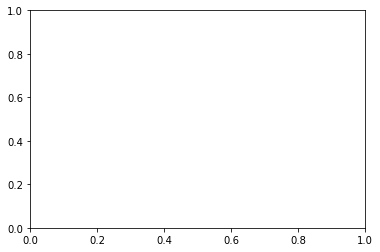

In [37]:
h = np.arange(0,13000,500) # 0-13000, step 500
speedstall = stallspeed(2968,11.61,1.8,h)
import matplotlib.pyplot as plt
plt.plot(h, speedstall) 
plt.xlabel ('Altitude(ft)')
plt.ylabel('Stall Speed (m/s)')
plt.title ('Stall Speed Vs Altitude EARTH')